In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display plots inline
%matplotlib inline

df = pd.read_csv('../../data/sierraleone-bumbuna.csv', parse_dates=['Timestamp']) 
df.head() 


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [2]:

display(df.describe().T)

# Missing-value report
missing = df.isna().sum()
pct_missing = (missing / len(df)) * 100
pd.DataFrame({'missing_count': missing, 'pct_missing': pct_missing}).query('pct_missing > 0')


,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-04-30 12:00:30.000000768,2021-10-30 00:01:00,2022-01-29 06:00:45,2022-04-30 12:00:30,2022-07-30 18:00:15,2022-10-30 00:00:00,NaN
GHI,525600.0,201.957515,-19.5,-2.8,0.3,362.4,1499.0,298.49515
DNI,525600.0,116.376337,-7.8,-0.3,-0.1,107.0,946.0,218.652659
DHI,525600.0,113.720571,-17.9,-3.8,-0.1,224.7,892.0,158.946032
ModA,525600.0,206.643095,0.0,0.0,3.6,359.5,1507.0,300.896893
ModB,525600.0,198.114691,0.0,0.0,3.4,345.4,1473.0,288.889073
Tamb,525600.0,26.319394,12.3,23.1,25.3,29.4,39.9,4.398605
RH,525600.0,79.448857,9.9,68.7,85.4,96.7,100.0,20.520775
WS,525600.0,1.146113,0.0,0.0,0.8,2.0,19.2,1.239248
WSgust,525600.0,1.691606,0.0,0.0,1.6,2.6,23.9,1.617053


,missing_count,pct_missing
Comments,525600,100.0


In [3]:
from scipy.stats import zscore

cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
zs = df[cols].apply(zscore, nan_policy='omit')
outliers = (zs.abs() > 3)

# Flag rows with any outlier
df['outlier_flag'] = outliers.any(axis=1)

# How many outliers?
df['outlier_flag'].sum(), len(df)

# Drop or impute
# e.g., median imputation
for c in cols:
    median = df.loc[~outliers[c], c].median()
    df.loc[df[c].isna() | outliers[c], c] = median


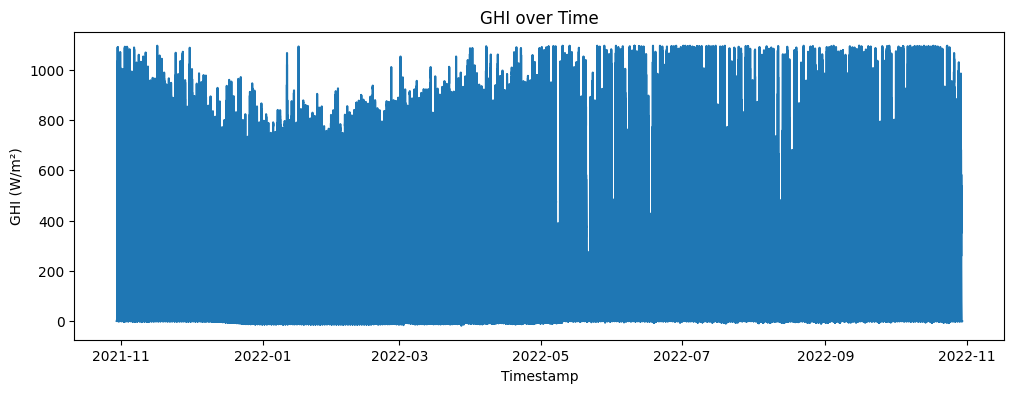

C:\Users\USER\AppData\Local\Temp\ipykernel_17060\1233816945.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('Timestamp')['GHI'].resample('M').mean()


Text(0.5, 1.0, 'Average Monthly GHI')

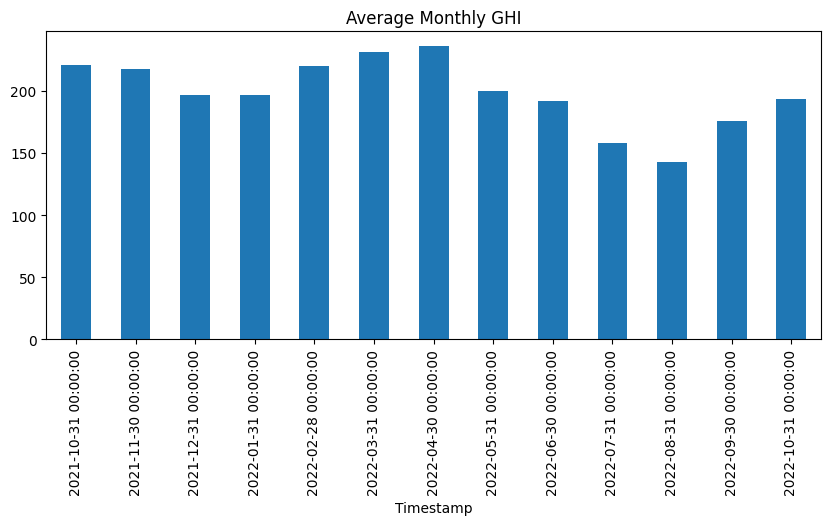

In [4]:
# Plot global irradiance over time
plt.figure(figsize=(12,4))
plt.plot(df['Timestamp'], df['GHI'])
plt.title('GHI over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.show()

# You can also resample by month:
monthly = df.set_index('Timestamp')['GHI'].resample('M').mean()
monthly.plot(kind='bar', figsize=(10,4))
plt.title('Average Monthly GHI')


Text(0.5, 1.0, 'Cleaning Impact')

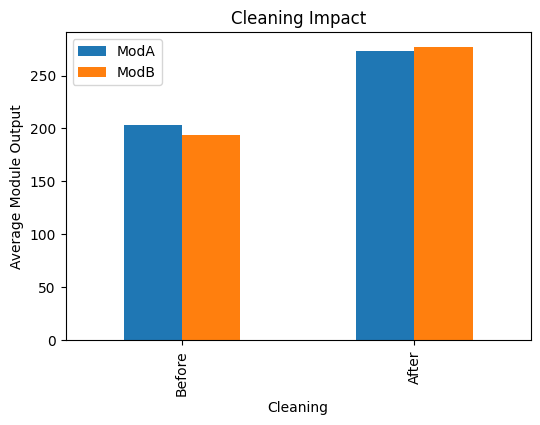

In [5]:
# Compare module readings pre/post cleaning
grouped = df.groupby('Cleaning')[['ModA','ModB']].mean().reset_index()
grouped.plot(x='Cleaning', kind='bar', figsize=(6,4))
plt.xticks([0,1], ['Before','After'])
plt.ylabel('Average Module Output')
plt.title('Cleaning Impact')


Text(0.5, 1.0, 'WS vs GHI')

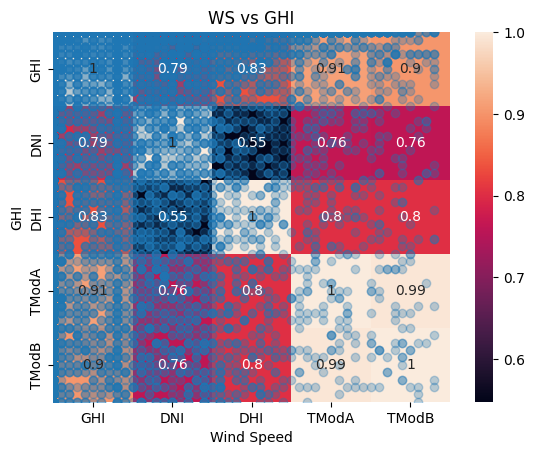

In [6]:
# Heatmap
corr = df[['GHI','DNI','DHI','TModA','TModB']].corr()
sns.heatmap(corr, annot=True)

# Scatter examples
plt.scatter(df['WS'], df['GHI'], alpha=0.3)
plt.xlabel('Wind Speed'); plt.ylabel('GHI')
plt.title('WS vs GHI')


Text(0.5, 1.0, 'GHI Distribution')

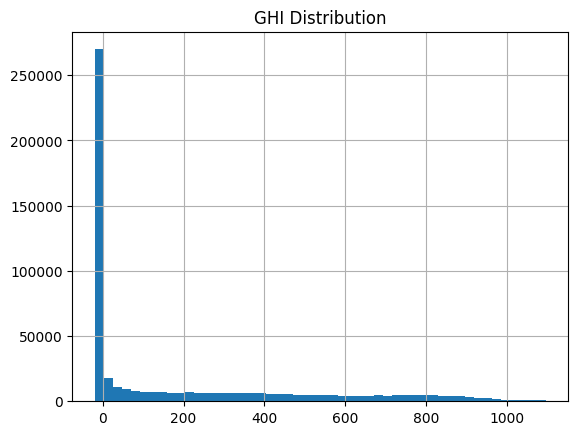

In [7]:
# Histogram of GHI
df['GHI'].hist(bins=50)
plt.title('GHI Distribution')

# Wind rose (via windrose library if you install it)
# from windrose import WindroseAxes
# ax = WindroseAxes.from_ax()
# ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
# ax.set_legend()


Text(0.5, 1.0, 'Relative Humidity vs Ambient Temp')

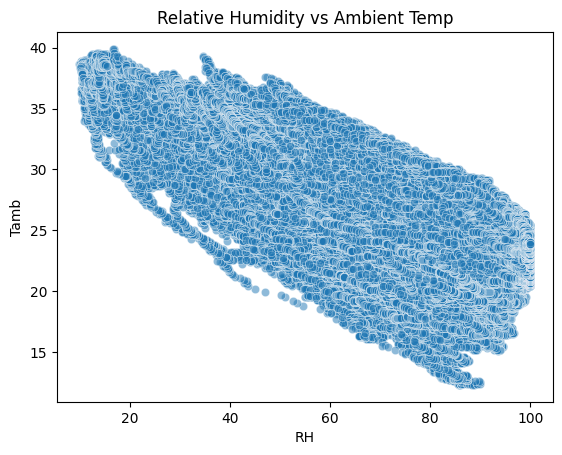

In [8]:
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.5)
plt.title('Relative Humidity vs Ambient Temp')


Text(0.5, 1.0, 'GHI vs Tamb (bubble = RH)')

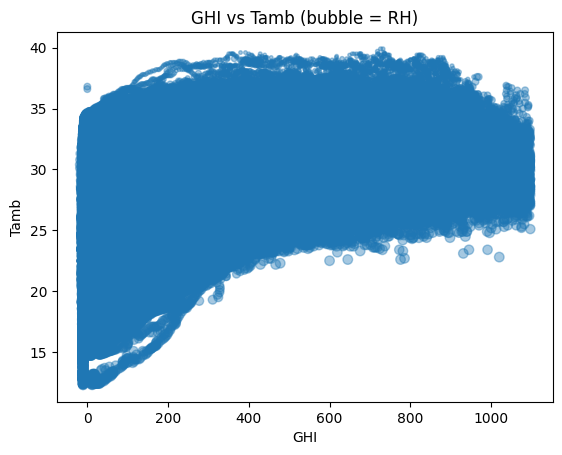

In [9]:
plt.scatter(
    df['GHI'], df['Tamb'],
    s=df['RH'] * 0.5,  # scale bubble by RH
    alpha=0.4
)
plt.xlabel('GHI'); plt.ylabel('Tamb')
plt.title('GHI vs Tamb (bubble = RH)')


In [10]:
df.to_csv('../../data/sierraleone_clean.csv', index=False)
